
# Evaluation Metrics for Classification

## Confusion Matrix

In classification tasks, we often need to evaluate how well our model performs. The ****confusion matrix**** is a powerful tool that summarizes the performance of a classification algorithm by comparing predicted and actual labels.

|                | **Predicted = 1**   | **Predicted = 0**   |
|-------------- |------------------- |------------------- |
| **Actual = 1** | True Positive (TP)  | False Negative (FN) |
| **Actual = 0** | False Positive (FP) | True Negative (TN)  |

From these four numbers we obtain the core metrics summarized below.

## Accuracy (Overall Success Rate)

Accuracy answers: "What fraction of **all** predictions are correct?"

$$\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{FN} + \text{TN}}$$

High accuracy is desirable, but it can be ****inflated**** when one class dominates.

## Precision (Positive Predictive Value)

Precision answers: "When the classifier predicts 1, how often is it correct?"

$$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$

High precision $\Rightarrow$ few false alarms, but it says nothing about missed positives.

## Recall (Sensitivity, True-Positive Rate)

Recall answers: "Of all the actual 1 cases, how many did we catch?"

$$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

High recall $\Rightarrow$ few misses, but it does not guard against many false alarms.

## F1-Score

The **F1-score** is the harmonic mean of precision and recall, balancing the two:

$$F_1 = 2 \cdot \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

It is 1 only when both precision and recall are 1; it drops sharply when either is low.

## Precision-Recall Trade-off

The precision-recall trade-off is a key concept in classification. By adjusting the decision threshold, we can increase precision at the cost of recall or vice versa. This trade-off is often visualized using the **precision-recall curve**, which plots precision against recall for different thresholds.

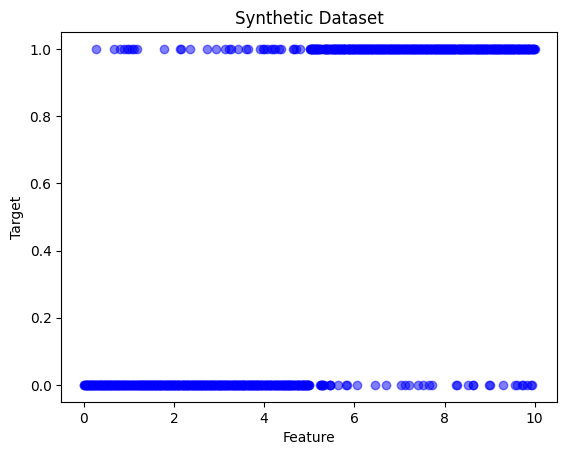

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Generating a synthetic and train a Logistic Regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = np.linspace(0, 10, 1001).reshape(-1, 1)
y = (X[:, 0] > 5).astype(int)  # Binary target based on a threshold

# Introduce some noise so that not all points are perfectly separable
noise = np.random.normal(0, 0.35, size=y.shape)
y = (y + noise > 0.5).astype(int)  # Add noise to the target

# Plotting the dataset
plt.scatter(X, y, color='blue', alpha=0.5)
plt.title("Synthetic Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

Model accuracy: 0.9303482587064676


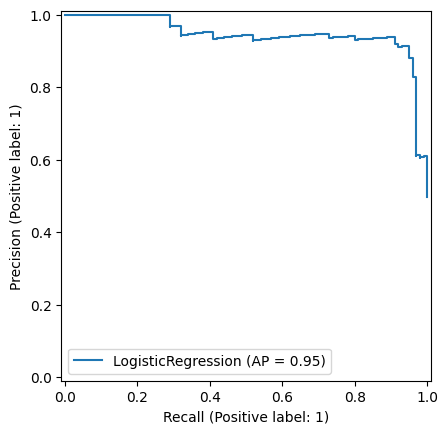

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

# Plotting the Precision-Recall curve
display = PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)

## Receiver Operating Characteristic (ROC) Curve

The ROC curve visualizes the trade-off between true positive rate (recall) and false positive rate (FPR) across different thresholds. The area under the ROC curve (AUC) quantifies the model's ability to distinguish between classes. AUC = 0.5 means random guessing, while AUC = 1 means perfect classification.

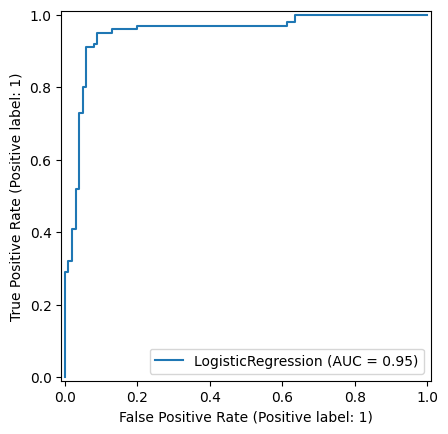

In [3]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
display = RocCurveDisplay.from_estimator(clf, X_test, y_test)

## Area Under the Curve (AUC)

The **AUC** (Area Under the Curve) is a single scalar value summarizing the ROC curve. It represents the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance. AUC = 0.5 indicates no discrimination ability, while AUC = 1 indicates perfect discrimination.

In [4]:
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print(f"AUC: {auc:.2f}")

AUC: 0.95


## Practical Demonstration

Below we create a simple synthetic binary dataset, train a classifier, and compute all four metrics.

-   Generating a synthetic dataset

In [5]:
from sklearn.datasets import make_classification
import pandas as pd

X, y = make_classification(n_samples=1000, n_features=5, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1,
                           flip_y=0.02, class_sep=1.0, random_state=42)
df = pd.DataFrame(X, columns=[f"feature{i}" for i in range(1, 6)])
df["target"] = y

-   Training/test split & model training

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = \
    train_test_split(df.drop(columns=["target"]), df["target"],
                     test_size=0.25, random_state=0, stratify=df["target"])

clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


-   Evaluating the model

Confusion matrix:
 [[108  17]
 [  9 116]]
              precision    recall  f1-score   support

           0      0.923     0.864     0.893       125
           1      0.872     0.928     0.899       125

    accuracy                          0.896       250
   macro avg      0.898     0.896     0.896       250
weighted avg      0.898     0.896     0.896       250



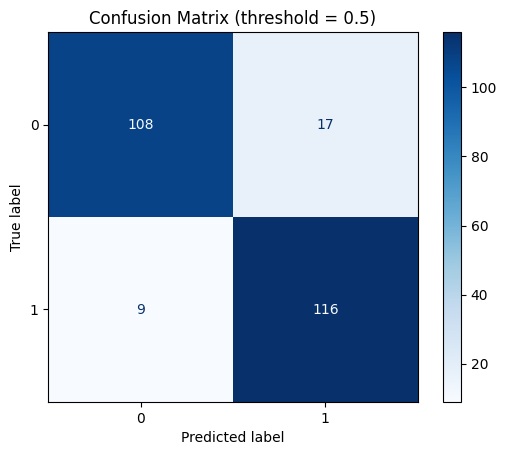

In [7]:
from sklearn.metrics import (
    classification_report, confusion_matrix,
    ConfusionMatrixDisplay, precision_recall_curve,
    accuracy_score
)
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix at the default 0.5 threshold
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Detailed report includes precision, recall, f1 and support
print(classification_report(y_test, y_pred, digits=3))

# Visualise confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,
                                             cmap='Blues')
plt.title("Confusion Matrix (threshold = 0.5)")
plt.show()

-   Precision-Recall curve

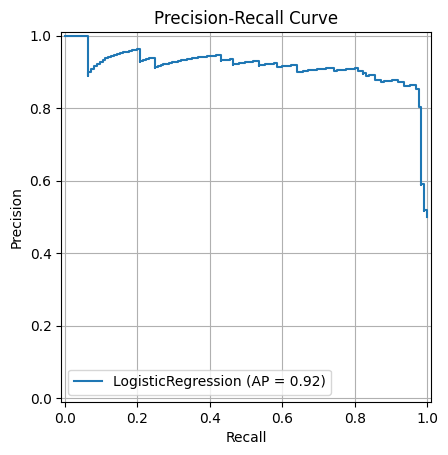

In [8]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

-   ROC curve

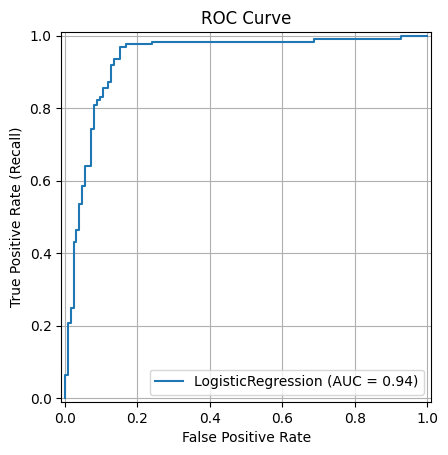

In [9]:
from sklearn.metrics import RocCurveDisplay
display = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.grid()
plt.show()

## Hands-on Exercises

-   **Threshold Tuning**: Try several probability thresholds and observe how accuracy, precision, recall and F1 change.

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Get predicted probabilities
y_scores = clf.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0.1, 0.9, 9)
for t in thresholds:
    y_pred_t = (y_scores >= t).astype(int)
    p = precision_score(y_test, y_pred_t)
    r = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)
    a = accuracy_score(y_test, y_pred_t)
    print(f"Threshold={t:.1f}: Acc={a:.3f}, Prec={p:.3f}, Recall={r:.3f}, F1={f1:.3f}")

-   **Class-Imbalance Scenario**:
    -   Generate a highly unbalanced dataset (e.g. 95% zeros, 5% ones); check the documentation of `make_classification`.
    -   Train the same model and compute the metrics again.
    -   Plot the **precision-recall curve** and choose a better threshold for the minority class.

In [ ]:
np.random.seed(42)  # For reproducibility
X_unb = np.linspace(0, 1, 1001).reshape(-1, 1)
y_unb = (X_unb[:, 0] > 0.95).astype(int)  # Binary target based on a threshold

# Introduce some noise so that not all points are perfectly separable
noise = np.random.normal(0, 0.5, size=y_unb.shape)
y_unb = (y_unb + noise > 0.95).astype(int)  # Add noise to the target

df_unb = pd.DataFrame(X_unb, columns=["feature"])
df_unb["target"] = y_unb

X_train_unb, X_test_unb, y_train_unb, y_test_unb = \
      train_test_split(df_unb.drop(columns=["target"]),
                       df_unb["target"],
                       test_size=0.25,
                       random_state=0,
                       stratify=df_unb["target"])

clf_unb = LogisticRegression(max_iter=500)
clf_unb.fit(X_train_unb, y_train_unb)

# Evaluate the model
y_pred_unb = clf_unb.predict(X_test_unb)
print(classification_report(y_test_unb, y_pred_unb))

# Precision-Recall curve
display = PrecisionRecallDisplay.from_estimator(clf_unb, X_test_unb, y_test_unb)
plt.title("Precision-Recall Curve (Unbalanced Dataset)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

y_scores_unb = clf_unb.predict_proba(X_test_unb)[:, 1]
thresholds_unb = np.linspace(0.01, 0.13, 13)
for t in thresholds_unb:
      y_pred_t_unb = (y_scores_unb >= t).astype(int)
      p = precision_score(y_test_unb, y_pred_t_unb)
      r = recall_score(y_test_unb, y_pred_t_unb)
      f1 = f1_score(y_test_unb, y_pred_t_unb)
      a = accuracy_score(y_test_unb, y_pred_t_unb)
      print(f"Threshold={t:.2f}: Acc={a:.3f}, Prec={p:.3f}, Recall={r:.3f}, F1={f1:.3f}")

-   **Multi-class Extension**
    -   Use the [classification\_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) on the Iris dataset and compare **macro** vs **weighted** F1.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = \
    train_test_split(iris.data, iris.target,
                     test_size=0.25, random_state=0, stratify=iris.target)
clf_iris = LogisticRegression(max_iter=500)
clf_iris.fit(X_train, y_train)
y_pred_iris = clf_iris.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_iris):.3f}")
print(classification_report(y_test, y_pred_iris, target_names=iris.target_names))

-   Plot the confusion matrix for the Iris dataset.